# Shopify 2021 Intern Data Science Challenge
## Question 1

As we see the AOV is extremly high for shoes(usually people buy one or two shoes at the time), we first begin by looking at if there are shoes that are extremely expensive.


In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
import pandas as pd
pd.set_option('display.max_rows', None)
holder = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data= holder
data = data[["shop_id","order_amount", "total_items"]]
data= data.groupby("shop_id").sum()
data["amount_per_item"] = data["order_amount"]/data["total_items"]
data = data.sort_values(by=['amount_per_item'], ascending=False)
print(data)


         order_amount  total_items  amount_per_item
shop_id                                            
78            2263800           88          25725.0
42           11990176        34063            352.0
12              18693           93            201.0
89              23128          118            196.0
99              18330           94            195.0
50              17756           92            193.0
38              13680           72            190.0
51              16643           89            187.0
6               22627          121            187.0
11              17480           95            184.0
79              17738           98            181.0
43              19367          107            181.0
90              19758          111            178.0
59              21538          121            178.0
60              16461           93            177.0
82              14691           83            177.0
81              22656          128            177.0
17          

Interestingly enough, shop 78 seems to sell extremely expensive shoes, as each shoe cost 25 725$(One model per store)
This definitively leads to an higher AOV as even one order of the shoes in this shop is the equivalent of 73 shoes in the next most expensive shoe store, shop #42. To continue, we look at if any huge orders skewed the data.

In [32]:
data = holder
data = data[["order_amount","user_id","shop_id","total_items"]]
data = data.sort_values(by=['order_amount'], ascending=False)
print(data)

      order_amount  user_id  shop_id  total_items
2153        704000      607       42         2000
3332        704000      607       42         2000
520         704000      607       42         2000
1602        704000      607       42         2000
60          704000      607       42         2000
2835        704000      607       42         2000
4646        704000      607       42         2000
2297        704000      607       42         2000
1436        704000      607       42         2000
4882        704000      607       42         2000
4056        704000      607       42         2000
15          704000      607       42         2000
1104        704000      607       42         2000
1562        704000      607       42         2000
2969        704000      607       42         2000
4868        704000      607       42         2000
1362        704000      607       42         2000
691         154350      878       78            6
2492        102900      834       78            4


We can already see how user 607 seems to be making huge orders at the time, this causes the AOV to skew upwards. 
As we can see, AOV is not a very useful statistics, as big orders and difference in price of each shoe can cause it to be non representative of the general sneaker shop situations. 

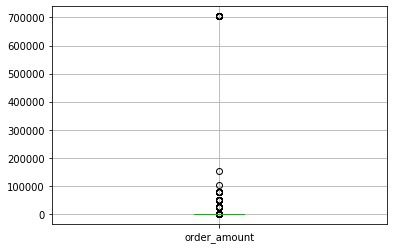

In [34]:
data =holder
data.boxplot("order_amount")

The box is basically a line at 0, meaning there is a huge amount of outliers in the dataset. When there are man outliers in the dataset, it is more optimal to use the median rather than the average. As we can see there are mainly maximum outliers, that we have taken a look at previously.

In [35]:
data["order_amount"].median()

284.0

284$ is a much more reasonable price per order of shoes. (Multiple shoes, more expensive shoes,ecetera)

In this case we are assuming that the outlier are factual correct information. That there was no issues that happenned with the data entry as one shoe for the price of 25 thousand dollars sound extremely expensive. 

Huge orders can easily be explained by being bought by a warehouse supplier/middleman.

In the case of problematic data entry, then it would be wise to remove such data and re-analyze the possibility of the AOV being reasonable.

Question 2 

a)How many orders were shipped by Speedy Express in total?

b)What is the last name of the employee with the most orders?


c)What product was ordered the most by customers in Germany?
